<a href="https://colab.research.google.com/github/Prateek-Poonia/Unsupervised-Machine-Learning/blob/main/Gaussian_DIstribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


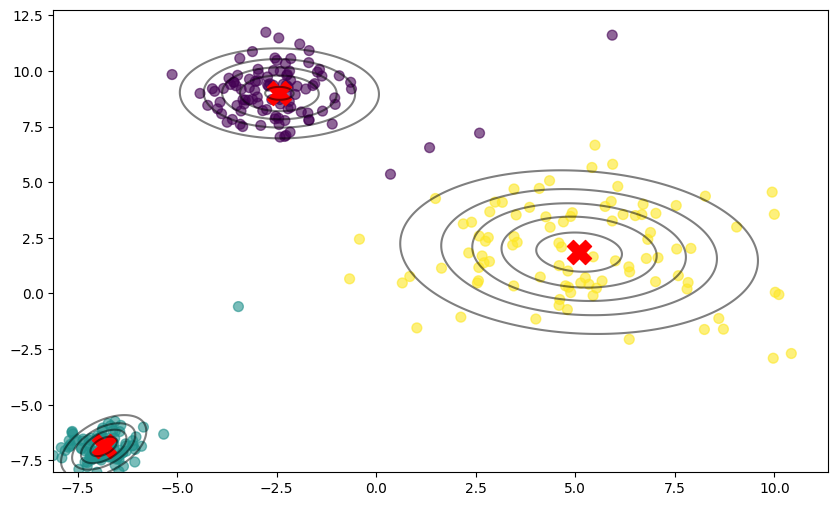

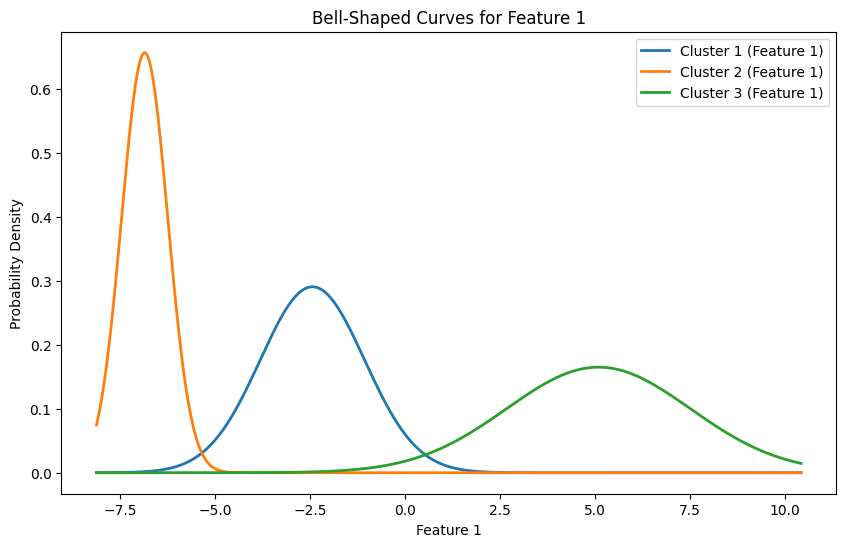

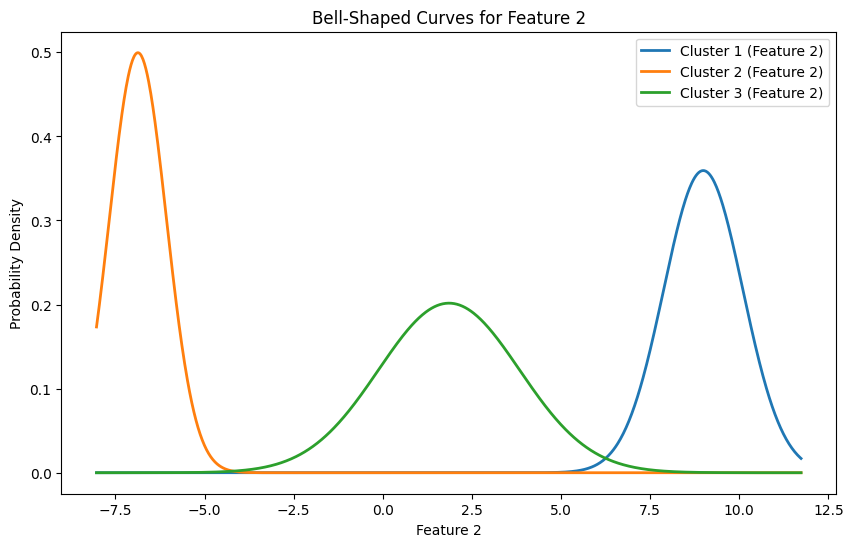

In [1]:
#Gaussian distribution curve using make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.stats import norm, multivariate_normal

# Generate synthetic data with Gaussian blobs
n_samples = 300
n_features = 2
centers = 3
cluster_std = [1.0, 2.5, 0.5]

X, y = make_blobs(n_samples=n_samples, n_features=n_features,
                  centers=centers, cluster_std=cluster_std, random_state=42)

# Perform K-means clustering
kmeans = KMeans(n_clusters=centers, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered data points
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.6)

# Plot the Gaussian distribution for each cluster
for i in range(centers):
    points = X[y_kmeans == i]
    mean = points.mean(axis=0)
    cov = np.cov(points.T)
    rv = multivariate_normal(mean, cov)
    x, y = np.mgrid[min(X[:,0]):max(X[:,0]):.01, min(X[:,1]):max(X[:,1]):.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, rv.pdf(pos), levels=5, colors='black', alpha=0.5)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X')

# Marginal distributions (bell-shaped curves)
# Feature 1
plt.figure(figsize=(10, 6))
for i in range(centers):
    points = X[y_kmeans == i]
    mean = points.mean(axis=0)[0]
    std_dev = points.std(axis=0)[0]
    x = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label=f'Cluster {i+1} (Feature 1)', linewidth=2)

plt.title('Bell-Shaped Curves for Feature 1')
plt.xlabel('Feature 1')
plt.ylabel('Probability Density')
plt.legend()

# Feature 2
plt.figure(figsize=(10, 6))
for i in range(centers):
    points = X[y_kmeans == i]
    mean = points.mean(axis=0)[1]
    std_dev = points.std(axis=0)[1]
    x = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label=f'Cluster {i+1} (Feature 2)', linewidth=2)
plt.title('Bell-Shaped Curves for Feature 2')
plt.xlabel('Feature 2')
plt.ylabel('Probability Density')
plt.legend()
# Show the plots
plt.show()


Confusion Matrix:
[[191   6]
 [  7   6]]


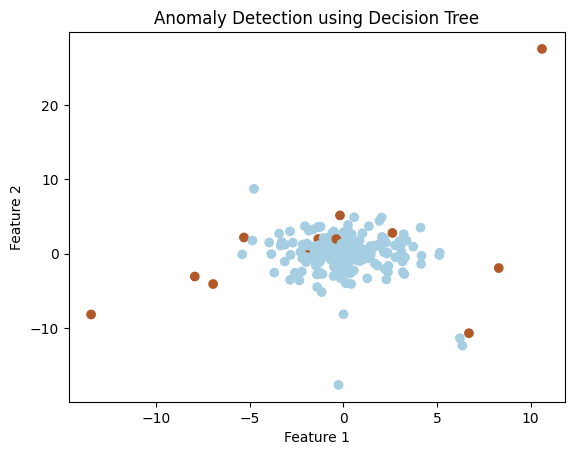

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Generate synthetic data
np.random.seed(42)
normal_data = np.random.randn(1000, 2) * 2  # Normal data points
anomaly_data = np.random.randn(50, 2) * 10  # Anomaly data points

# Create labels (0 for normal, 1 for anomalies)
labels = np.zeros(normal_data.shape[0])
anomaly_labels = np.ones(anomaly_data.shape[0])
labels = np.concatenate((labels, anomaly_labels))

# Combine normal and anomaly data
data = np.vstack((normal_data, anomaly_data))
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# Fit Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predict anomalies
predictions = model.predict(X_test)
# Evaluate model performance
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)
# Plot the data and decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=plt.cm.Paired)
plt.title("Anomaly Detection using Decision Tree")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
